# Probability Density Estimation Using KDE

In [1]:
import pandas as pd
import numpy as np

## Preprocessing the dataset

In [22]:
df = pd.read_excel('./All datasets/Dataset_Taiwan_Preprocessed.xlsx')
df = df[:37]
df

,Unnamed: 0,Date (mm/dd/yr),Time,Lat,Lon,Depth,Mag,Intervent Counts
0,0,1964-01-18,12:04:40,23.1000,120.5000,33.0,6.8,10
1,1,1965-05-17,17:19:25.900000,22.5000,121.3000,21.0,6.2,24
2,2,1970-11-14,07:58:19.800000,22.7110,121.3440,28.0,6.1,81
3,3,1972-04-24,09:57:21.700000,23.6380,121.5510,33.0,6.9,22
4,4,1972-09-22,19:57:27.400000,22.3310,121.1970,33.0,6.2,19
5,5,1972-11-09,18:41:14.500000,23.8850,121.5810,33.0,6.1,9
6,6,1978-07-23,14:42:36.900000,22.2820,121.5120,17.0,7.4,92
7,7,1978-09-02,01:57:33.400000,24.8960,121.9850,109.0,6.1,34
8,8,1986-05-20,05:25:46.960000,24.1250,121.6190,19.3,6.1,207
9,9,1986-11-14,21:20:10.550000,23.9010,121.5740,33.8,7.8,19


In [23]:
x = np.array(df['Intervent Counts'])
x = np.sort(x)
print(x[:, None])

[[  1]
 [  9]
 [  9]
 [ 10]
 [ 12]
 [ 17]
 [ 19]
 [ 19]
 [ 22]
 [ 23]
 [ 24]
 [ 24]
 [ 30]
 [ 33]
 [ 34]
 [ 34]
 [ 37]
 [ 44]
 [ 52]
 [ 54]
 [ 60]
 [ 62]
 [ 65]
 [ 81]
 [ 83]
 [ 88]
 [ 90]
 [ 92]
 [109]
 [126]
 [128]
 [131]
 [158]
 [166]
 [191]
 [207]
 [349]]


##Grid Search for KDE Parameters

In [24]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import LeaveOneOut
from sklearn.neighbors import KernelDensity

bandwidths = 10 ** np.linspace(-1, 1, 100)
grid = GridSearchCV(KernelDensity(kernel='gaussian'),
                    {'bandwidth': bandwidths},
                    cv=LeaveOneOut())
grid.fit(x[:, None]);

In [25]:
grid.best_params_

{'bandwidth': 10.0}

## Implementing KDE

In [26]:
import matplotlib.pyplot as plt

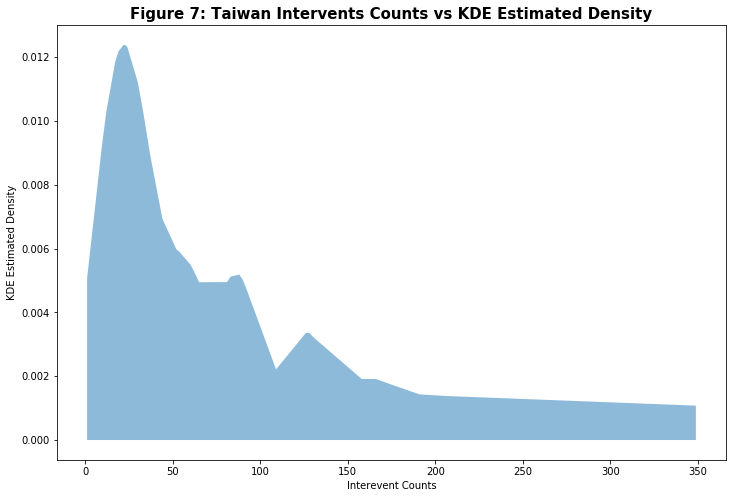

In [27]:
# instantiate and fit the KDE model
kde = KernelDensity(bandwidth=10.0, kernel='gaussian')
kde.fit(x[:, None])

# score_samples returns the log of the probability density
logprob = kde.score_samples(x[:, None])

fig = plt.subplots(figsize=(12, 8))
plt.ylabel('KDE Estimated Density')
plt.xlabel('Interevent Counts')
plt.title('Figure 7: Taiwan Intervents Counts vs KDE Estimated Density', fontweight='bold', fontsize=15)
plt.fill_between(x, np.exp(logprob), alpha=0.5)
plt.show()

## Postprocessing the dataset
> Adding corrresponding probablity estimates to the dataset for later use.

In [16]:
prob_df = pd.DataFrame(x, columns=['Intervent Counts'])

In [17]:
prob_df['Probability'] = np.exp(logprob)

In [18]:
prob_df

,Intervent Counts,Probability
0,1,0.005080
1,9,0.009000
2,9,0.009000
3,10,0.009455
4,12,0.010296
5,17,0.011842
6,19,0.012189
7,19,0.012189
8,22,0.012389
9,23,0.012371


In [19]:
merged_df = df.merge(prob_df)

In [20]:
merged_df

,Unnamed: 0,Date (mm/dd/yr),Time,Lat,Lon,Depth,Mag,Intervent Counts,Probability
0,0,1964-01-18,12:04:40,23.1000,120.5000,33.0,6.8,10,0.009455
1,1,1965-05-17,17:19:25.900000,22.5000,121.3000,21.0,6.2,24,0.012312
2,1,1965-05-17,17:19:25.900000,22.5000,121.3000,21.0,6.2,24,0.012312
3,26,2007-01-25,10:59:17.650000,22.5640,121.9260,36.2,6.0,24,0.012312
4,26,2007-01-25,10:59:17.650000,22.5640,121.9260,36.2,6.0,24,0.012312
5,2,1970-11-14,07:58:19.800000,22.7110,121.3440,28.0,6.1,81,0.004950
6,3,1972-04-24,09:57:21.700000,23.6380,121.5510,33.0,6.9,22,0.012389
7,4,1972-09-22,19:57:27.400000,22.3310,121.1970,33.0,6.2,19,0.012189
8,4,1972-09-22,19:57:27.400000,22.3310,121.1970,33.0,6.2,19,0.012189
9,9,1986-11-14,21:20:10.550000,23.9010,121.5740,33.8,7.8,19,0.012189
